# Module 8 - Data Visualization with Python: Final Project

# Tarie Nosworthy

In this assignment, you will develop a comprehensive data visualization project that explores fluctuations in automobile sales alongside various economic indicators such as GDP, unemployment rates, and advertising expenditures. The project is divided into two key parts. In the first section, you will utilize Python libraries like pandas, Seaborn, and Matplotlib to create a range of static visualizations. These include line charts to depict year-over-year sales trends, bubble plots to show the impact of seasonality, scatter plots to examine the relationship between average vehicle prices and sales volumes during recession periods, and pie charts to illustrate advertising expenditure across different vehicle types and economic conditions.

The second part of the assignment shifts focus to building an interactive dashboard using the Dash framework. Here, you will design a user-friendly web application featuring dropdown menus, designated output display areas, and dynamic callbacks that update the content based on user interaction. The dashboard will showcase Recession Report Statistics and Yearly Report Statistics, offering an interactive means to analyze and compare data trends. Peer grading will be used to evaluate the clarity, functionality, and analytical depth of your visualizations and dashboard, ensuring that you effectively communicate your findings through engaging and insightful presentations.

# Setup libraries to use in notebook and load csv file by panda

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# create a variable with the provided url and file name
auto_sales = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'

# create the dataframe and define the first column as index
df_auto_sales = pd.read_csv(auto_sales, index_col=[0])

# show the data frame
df_auto_sales

,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
Date,,,,,,,,,,,,,,
1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California


# Part 1: Data Visualizations (10 points)

Task 1.1 – Line Chart for Yearly Automobile Sales (1 point):

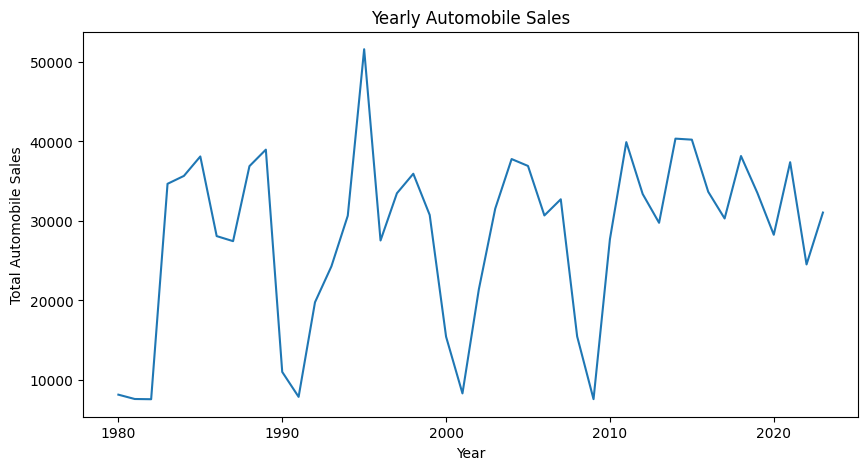

In [2]:
# Aggregate total automobile sales per year
sales_by_year = df_auto_sales.groupby('Year')['Automobile_Sales'].sum()

# Plot a line chart using pandas
sales_by_year.plot(kind='line', figsize=(10, 5), title="Yearly Automobile Sales")
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.show()

Task 1.2 – Multiple Lines for Vehicle Types (1 point):

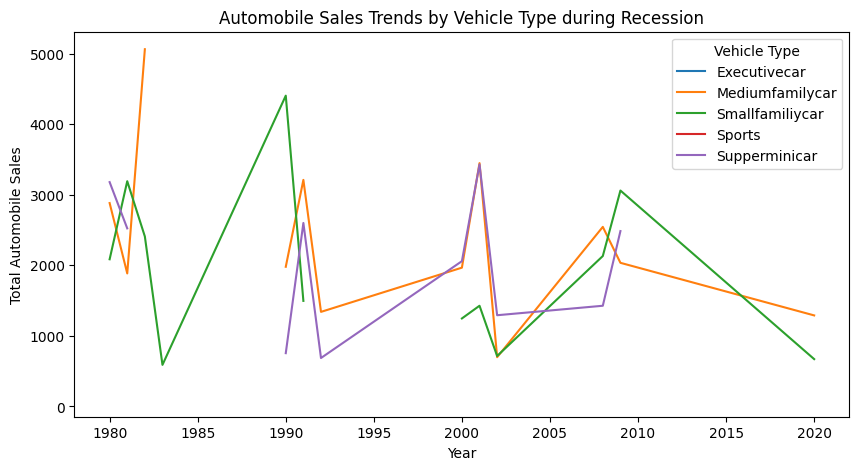

In [3]:
# Filter data for recession periods (where Recession == 1)
df_recession = df_auto_sales[df_auto_sales['Recession'] == 1]

# Create a pivot table: rows are years, columns are vehicle types, values are total sales
sales_by_vehicle = df_recession.pivot_table(index='Year', 
                                              columns='Vehicle_Type', 
                                              values='Automobile_Sales', 
                                              aggfunc='sum')

# Plot the line chart for each vehicle type
sales_by_vehicle.plot(kind='line', figsize=(10, 5), title="Automobile Sales Trends by Vehicle Type during Recession")
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.legend(title="Vehicle Type")
plt.show()

Task 1.3 – Seaborn Visualization Comparing Recession vs. Non-Recession Trends (1 point):

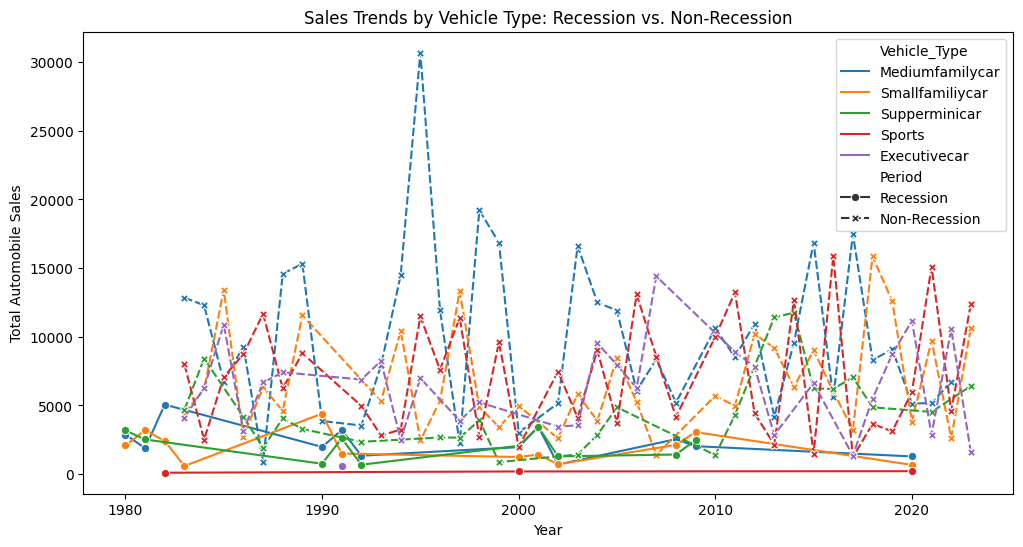

In [4]:
import seaborn as sns

# Create a new column 'Period' based on the Recession indicator
df_auto_sales['Period'] = df_auto_sales['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Group the data by Year, Vehicle_Type, and Period for a cleaner plot
df_grouped = df_auto_sales.groupby(['Year', 'Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period', markers=True)
plt.title("Sales Trends by Vehicle Type: Recession vs. Non-Recession")
plt.xlabel("Year")
plt.ylabel("Total Automobile Sales")
plt.show()

# TASK 1.4: Subplots for GDP Variations (2 points)
We compare the average GDP for recession and non-recession periods by aggregating by year and then plotting side-by-side line charts:

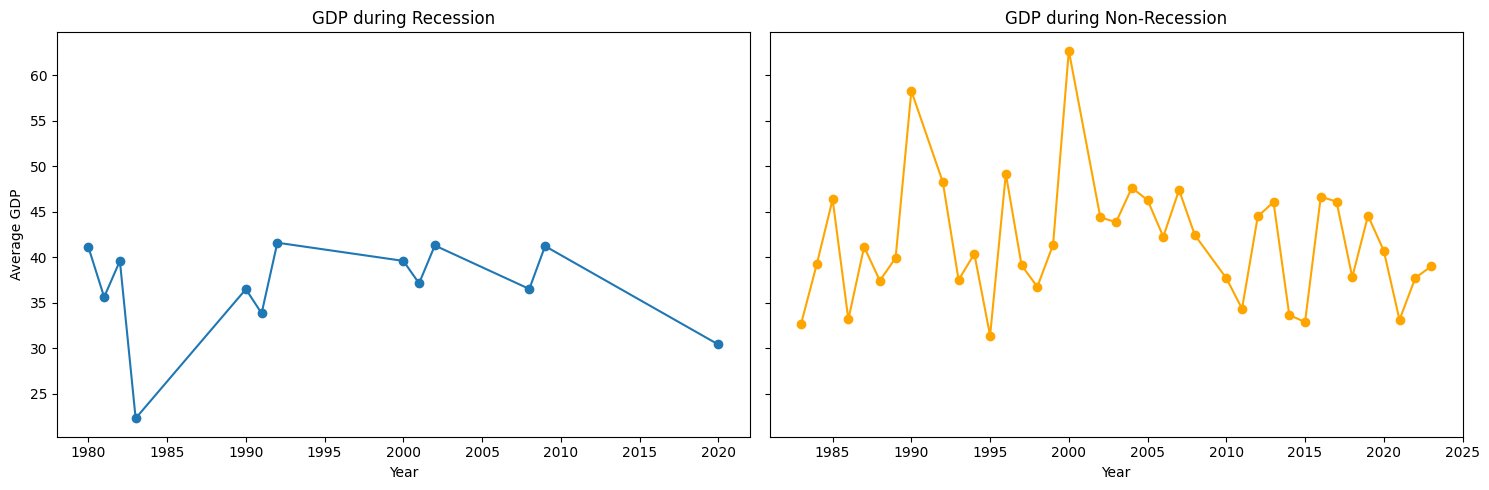

In [5]:
# Calculate average GDP per year for recession and non-recession periods
gdp_recession = df_auto_sales[df_auto_sales['Recession'] == 1].groupby('Year')['GDP'].mean()
gdp_non_recession = df_auto_sales[df_auto_sales['Recession'] == 0].groupby('Year')['GDP'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Recession period GDP
axs[0].plot(gdp_recession.index, gdp_recession.values, marker='o')
axs[0].set_title("GDP during Recession")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Average GDP")

# Non-Recession period GDP
axs[1].plot(gdp_non_recession.index, gdp_non_recession.values, marker='o', color='orange')
axs[1].set_title("GDP during Non-Recession")
axs[1].set_xlabel("Year")

plt.tight_layout()
plt.show()

# TASK 1.5: Bubble Plot – Impact of Seasonality on Automobile Sales (1 point)
Here we use the “Seasonality_Weight” for the x-axis and “Automobile_Sales” for the y-axis, with bubble size also reflecting sales (scaled as needed):

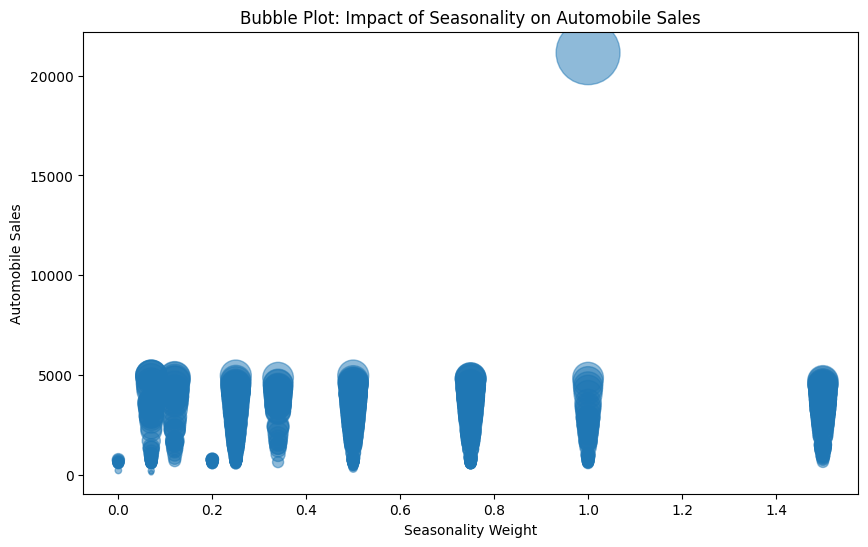

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df_auto_sales['Seasonality_Weight'], df_auto_sales['Automobile_Sales'], 
            s=df_auto_sales['Automobile_Sales']*0.1, alpha=0.5)
plt.title("Bubble Plot: Impact of Seasonality on Automobile Sales")
plt.xlabel("Seasonality Weight")
plt.ylabel("Automobile Sales")
plt.show()

# TASK 1.6: Scatter Plot – Price vs. Sales during Recession (1 point)
Focus on recession periods and plot “Price” against “Automobile_Sales”:

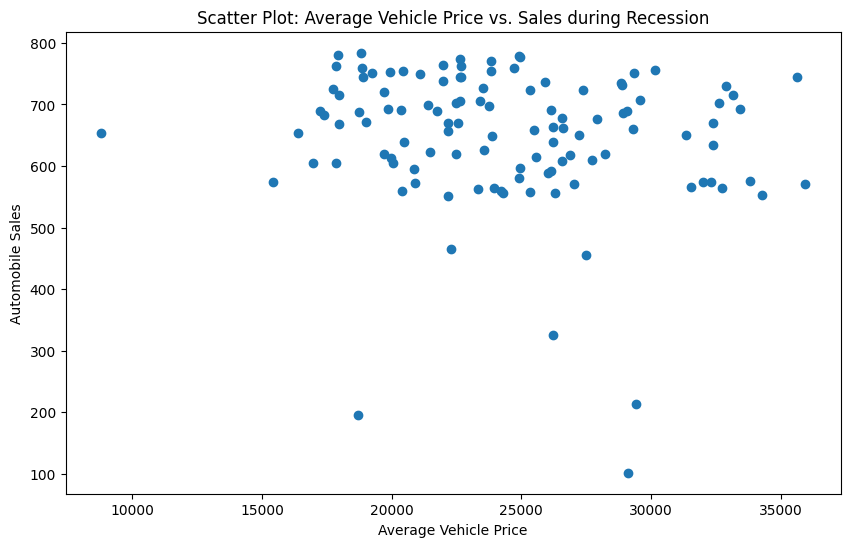

In [7]:
# Filter recession data
recession_data = df_auto_sales[df_auto_sales['Recession'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])
plt.title("Scatter Plot: Average Vehicle Price vs. Sales during Recession")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Automobile Sales")
plt.show()

# TASK 1.7: Pie Chart – Advertising Expenditure (Recession vs. Non-Recession) (1 point)
Aggregate the total advertising expenditure for recession and non-recession periods:

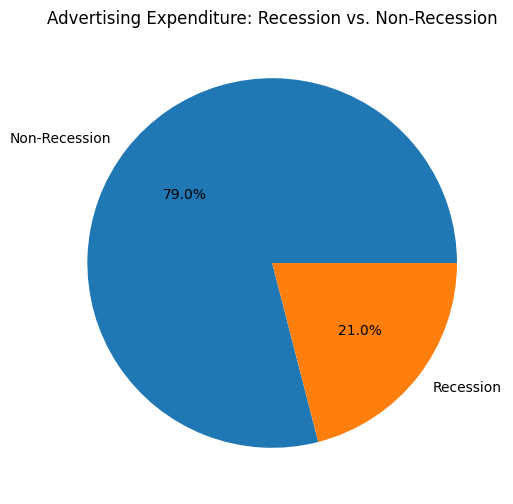

In [8]:
# Group by the Recession column and sum advertising expenditure
ad_expenditure = df_auto_sales.groupby('Recession')['Advertising_Expenditure'].sum()

# Map 1 to "Recession" and 0 to "Non-Recession"
labels = ['Recession' if x == 1 else 'Non-Recession' for x in ad_expenditure.index]

plt.figure(figsize=(6, 6))
plt.pie(ad_expenditure, labels=labels, autopct='%1.1f%%')
plt.title("Advertising Expenditure: Recession vs. Non-Recession")
plt.show()

# TASK 1.8: Pie Chart – Advertisement Expenditure by Vehicle Type during Recession (1 point)
Filter the data to recession periods, then group by “Vehicle_Type”:

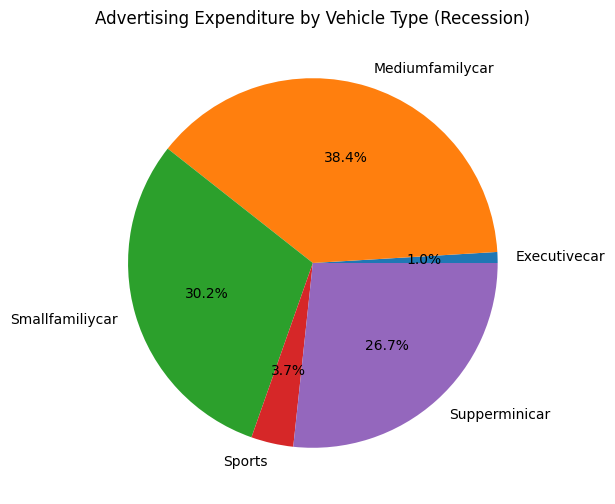

In [9]:
# Use the recession filtered DataFrame from before (df_recession)
ad_by_vehicle = df_recession.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(6, 6))
plt.pie(ad_by_vehicle, labels=ad_by_vehicle.index, autopct='%1.1f%%')
plt.title("Advertising Expenditure by Vehicle Type (Recession)")
plt.show()

# TASK 1.9: Line Plot – Unemployment Rate and Sales for Each Vehicle Type during Recession (1 point)

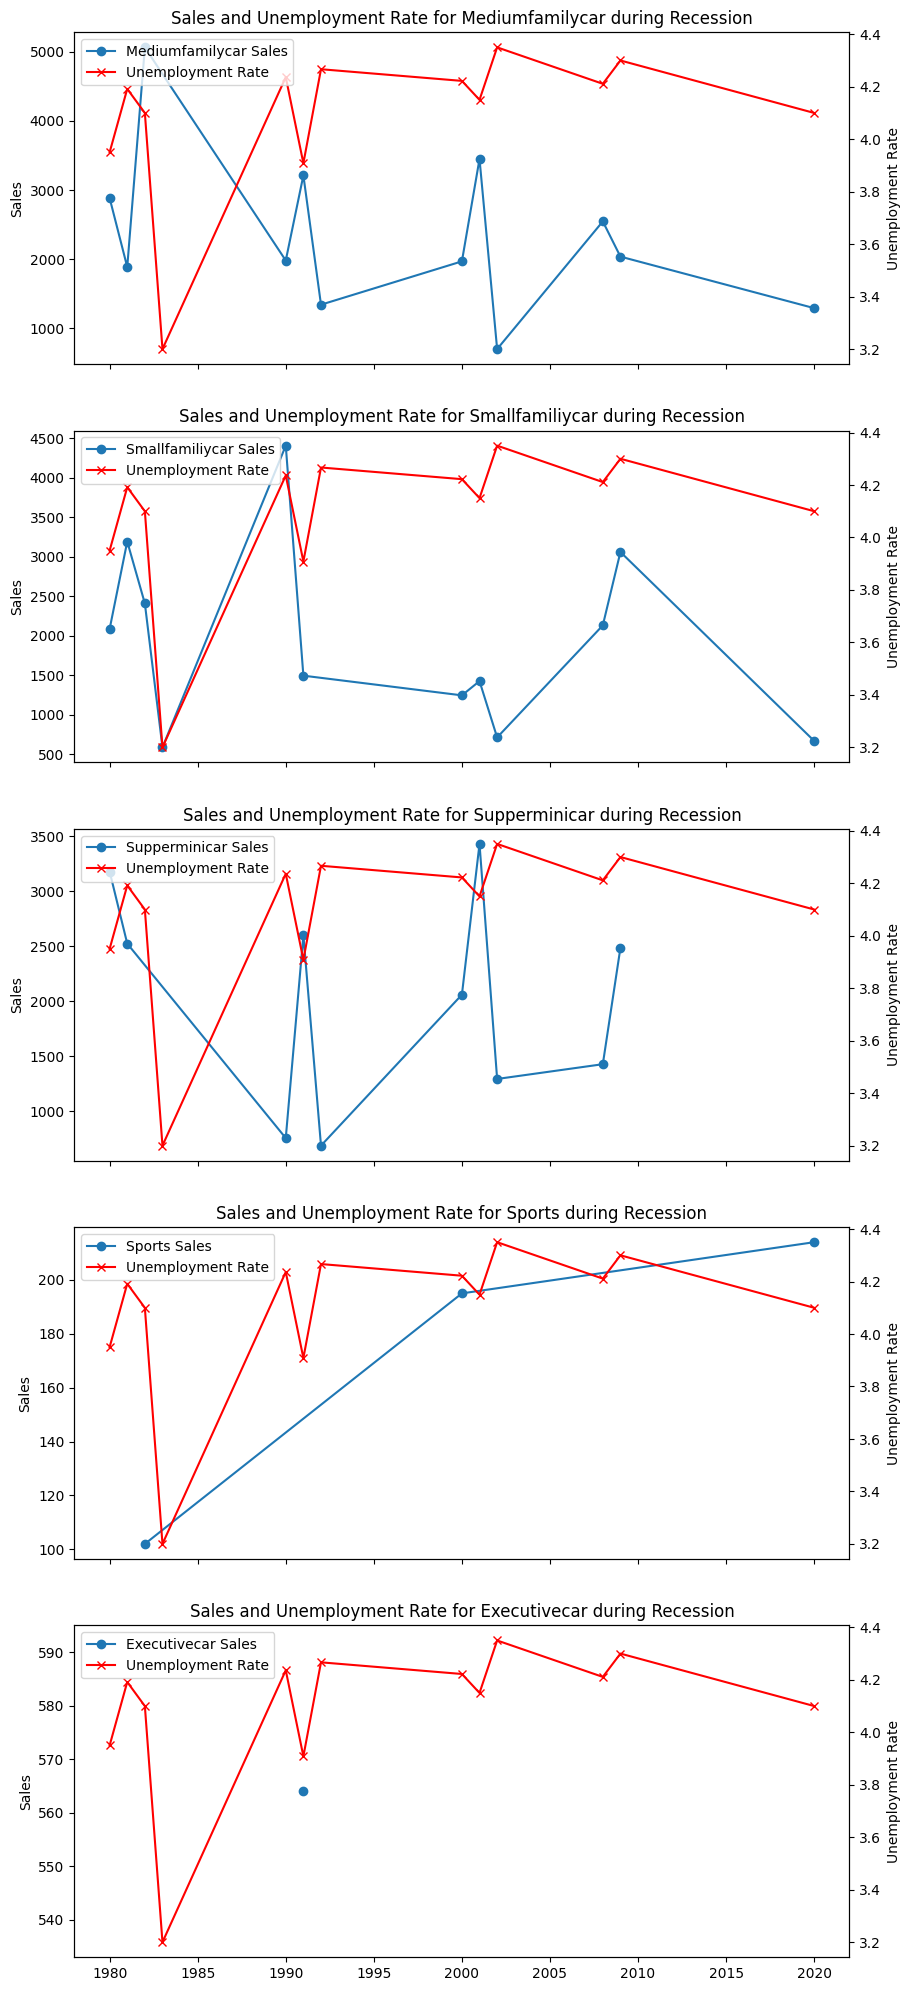

In [10]:
# Filter recession data and aggregate sales by Year and Vehicle_Type
sales_by_vehicle_year = df_recession.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Aggregate average unemployment rate by Year for recession periods
unemp_by_year = df_recession.groupby('Year')['unemployment_rate'].mean()

# Get unique vehicle types in the recession data
vehicle_types = sales_by_vehicle_year['Vehicle_Type'].unique()

# Create subplots for each vehicle type
fig, axs = plt.subplots(len(vehicle_types), 1, figsize=(10, 5 * len(vehicle_types)), sharex=True)

# In case there is only one vehicle type, make axs iterable
if len(vehicle_types) == 1:
    axs = [axs]

for ax, vt in zip(axs, vehicle_types):
    data_vt = sales_by_vehicle_year[sales_by_vehicle_year['Vehicle_Type'] == vt]
    ax.plot(data_vt['Year'], data_vt['Automobile_Sales'], marker='o', label=f"{vt} Sales")
    ax.set_ylabel("Sales")
    # Create a twin axis for unemployment rate
    ax2 = ax.twinx()
    ax2.plot(unemp_by_year.index, unemp_by_year.values, color='red', marker='x', label="Unemployment Rate")
    ax2.set_ylabel("Unemployment Rate")
    ax.set_title(f"Sales and Unemployment Rate for {vt} during Recession")
    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.xlabel("Year")
plt.show()

## Part 2 – Building a Dash Dashboard (14 points)

In [12]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# TASK 2.1: Create a Dash application with a meaningful title
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

# TASK 2.2 & 2.3: Define the layout with dropdowns and an output division
app.layout = html.Div([
    html.H1("Automobile Sales and Economic Indicators Dashboard"),
    dcc.Dropdown(
        id='report-type',
        options=[
            {'label': 'Recession Report Statistics', 'value': 'recession'},
            {'label': 'Yearly Report Statistics', 'value': 'yearly'}
        ],
        value='recession',
        clearable=False
    ),
    html.Div(id='output-container', className='output-class')
])

# TASK 2.4: Create a callback to update the output container based on dropdown selection
@app.callback(
    Output('output-container', 'children'),
    [Input('report-type', 'value')]
)
def update_output(selected_report):
    if selected_report == 'recession':
        # TASK 2.5: For recession report, filter the data and aggregate by Year
        df_recession = df_auto_sales[df_auto_sales['Recession'] == 1]
        df_grouped = df_recession.groupby('Year', as_index=False)['Automobile_Sales'].sum()
        fig = px.line(df_grouped, x='Year', y='Automobile_Sales', title='Recession Report: Automobile Sales')
    else:
        # TASK 2.6: For yearly report, aggregate over all data by Year
        df_grouped = df_auto_sales.groupby('Year', as_index=False)['Automobile_Sales'].sum()
        fig = px.line(df_grouped, x='Year', y='Automobile_Sales', title='Yearly Report: Automobile Sales')
    return dcc.Graph(figure=fig)

# Run the Dash app (for Jupyter, you may need to use JupyterDash instead)
if __name__ == '__main__':
    app.run(debug=True)
